In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from pandas.plotting import andrews_curves
import pylab
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Model repository

In [2]:
q_dist = ['uniform','power_law']
m_dist = q_dist
approach = ['baseline_pareto','optimizer']


def load_pareto(m_dist):
    filepath = 'repository/pareto_only_model_'+m_dist+'.csv'
    df = pd.read_csv(filepath,index_col=0)
    print(df.shape)
#     print(df.head())
    return df

filepath = 'repository/pareto_only_model_uniform.csv'
df_pareto =  pd.read_csv(filepath,index_col=0)

filepath = 'repository/model_repository_uniform.csv'
df_uni =  pd.read_csv(filepath,index_col=0)
tasks = ['P'+str(idx) for idx in range(len(df_uni.columns)-1)]
df_uni.columns = tasks+['cost']
print('len of df is: '+str(len(df_uni.columns)))

models = ['M'+str(idx) for idx in range(len(df_uni.index))]
df_uni.index = models

len of df is: 1922


In [3]:
df_uni.head()

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P1912,P1913,P1914,P1915,P1916,P1917,P1918,P1919,P1920,cost
M0,0.775475,0.609524,0.710345,0.684211,0.668449,0.753138,0.641593,0.527687,0.632035,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0
M1,0.709911,0.537037,0.583053,0.607407,0.750000,0.645455,0.731579,0.486607,0.561224,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0
M2,0.936210,0.901786,0.875616,0.899497,0.938596,0.882051,0.912409,0.790698,0.918182,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0
M3,0.954582,0.930851,0.907407,0.944238,0.975610,0.934211,0.973856,0.844221,0.920000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0
M4,0.830052,0.731915,0.761962,0.841216,0.871622,0.825397,0.827027,0.585799,0.708215,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0


In [ ]:
plt.rcParams['figure.dpi'] = 200
def plot(df,df_uni,T,opt_m,base_m):
    for i, t in enumerate(T):
        data = df_pareto.loc[:,[t,'cost']]
        data.dropna(inplace=True)
        print(data.shape)

        data_uni = df_uni.loc[:,[t,'cost']]
        data_uni.dropna(inplace=True)
        print(data_uni.shape)

        fig, ax = plt.subplots()
        ax.scatter(df_uni['cost'], df_uni[t])
        ax.scatter(df['cost'], df[t],c='orange')
        #baseline selected
        ax.scatter(df.loc[base_m[i],'cost'], df.loc[base_m[i],t],label='baseline selected')
        # optimizer selected
        ax.scatter(df_uni.loc[opt_m[i],'cost'], df_uni.loc[opt_m[i],t],label='optimizer selected')
        
        plt.title('Summary of '+t)
        plt.xlabel('Cost')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()
    
#T1878.M1094|T65.M189
plot(df_pareto,df_uni,['P1878','T65'],['M869','M1276'],['M1094','M189'])

(6, 2)
(303, 2)


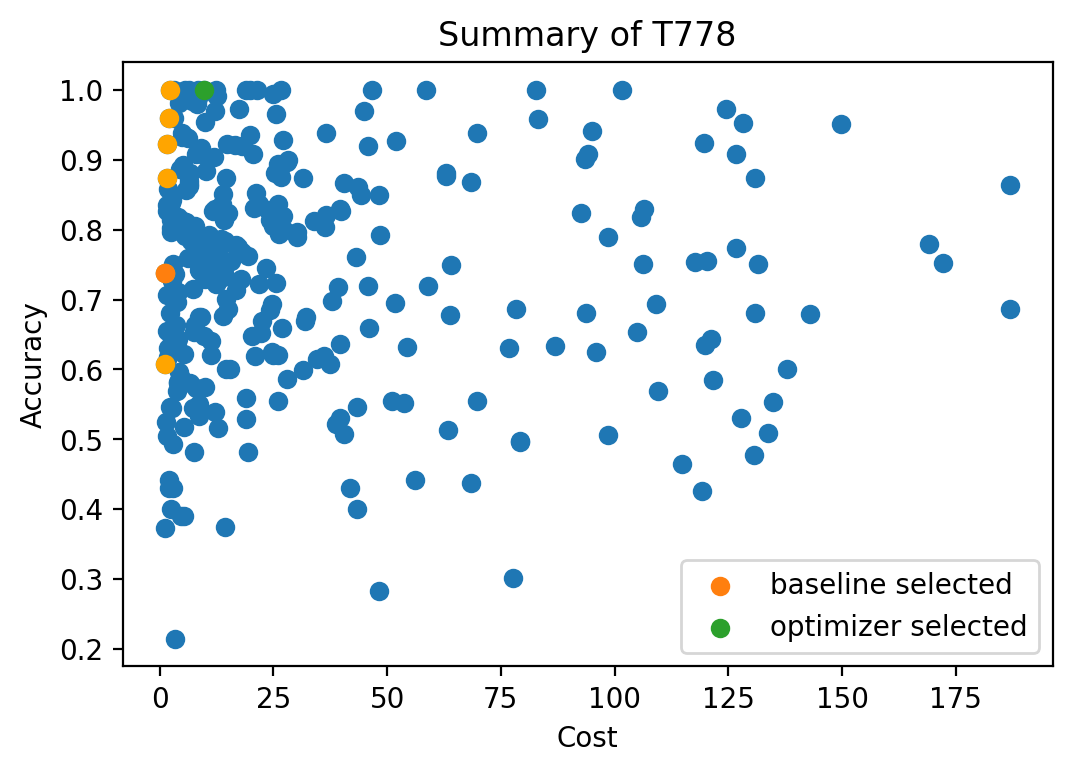

(5, 2)
(312, 2)


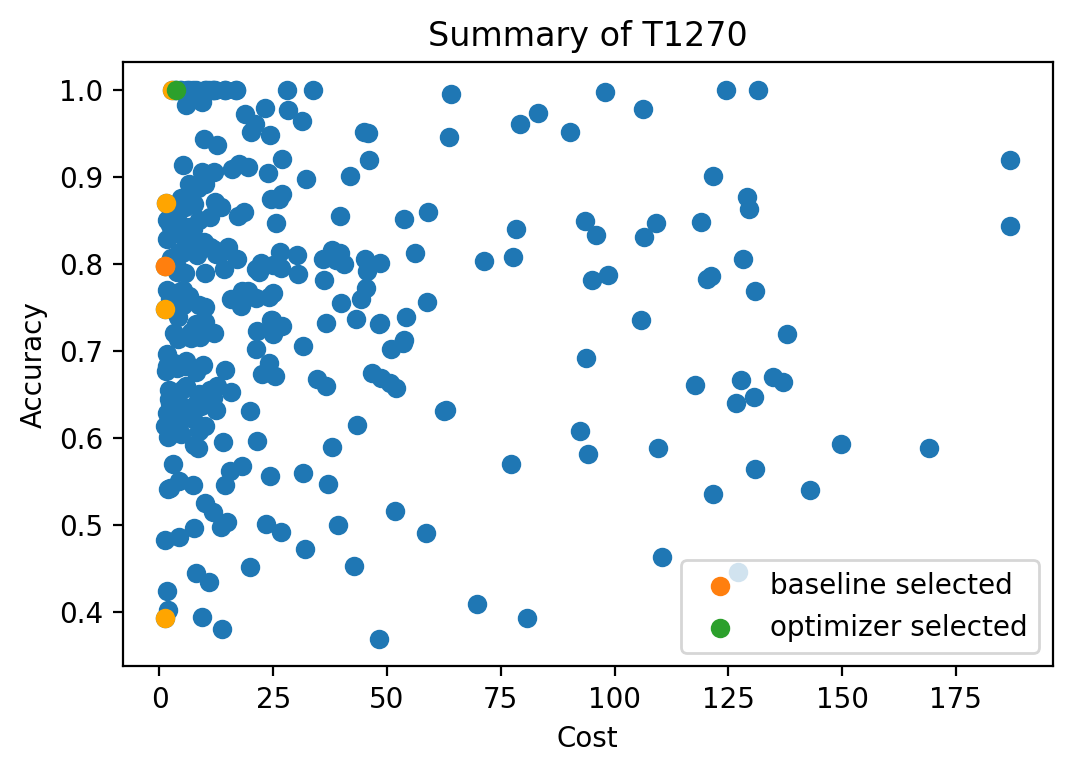

In [17]:
# T778.M762&T1270.M1100
# T778.M1169|T1270.M1135
plot(df_pareto,df_uni,['T778','T1270'],['M762','M1100'],['M1169','M1135'])

## Summary

In [4]:
q_dist = ['uniform','power_law']
m_dist = q_dist
dist_abbr = ['uni','pow']
approach = ['baseline_pareto','optimizer','order_opt']
abbrv = ['baseline','basic_opt','order_opt']


def load_cost(m_dist,q_dist,approach):
    filepath = 'output/synthetic/summary_cost_'+m_dist+'_'+q_dist+'_'+approach+'.csv'
    if approach == 'order_opt':
        filepath = 'output/synthetic/summary_order_cost_'+m_dist+'_'+q_dist+'_optimizer.csv'
    try:
        df = pd.read_csv(filepath,index_col=0)
    except Exception as e:
        filepath = 'output/synthetic/summary_cost_'+m_dist+'_'+q_dist+'_'+approach+'_a=5.csv'
        df = pd.read_csv(filepath,index_col=0)
        
    print(df.shape)
#     print(df.head())
    return df

df_list = []
label_list = []
df_dict = {}
for i,q in enumerate(q_dist):
    for j,m in enumerate(m_dist):
        for k,app in enumerate(approach):
            df = load_cost(m,q,app)
            df_list.append(df)
            name = abbrv[k]+':'+dist_abbr[j]+':'+dist_abbr[i]
            label_list.append(name)
            df_dict[name]=df
print(list(df_dict.keys()))
df.head()

(450, 19)
(450, 19)
(450, 19)
(450, 19)
(450, 19)
(450, 19)
(405, 19)
(405, 19)
(405, 19)
(405, 19)
(405, 19)
(405, 19)
['baseline:uni:uni', 'basic_opt:uni:uni', 'order_opt:uni:uni', 'baseline:pow:uni', 'basic_opt:pow:uni', 'order_opt:pow:uni', 'baseline:uni:pow', 'basic_opt:uni:pow', 'order_opt:uni:pow', 'baseline:pow:pow', 'basic_opt:pow:pow', 'order_opt:pow:pow']


,query_index,qgetSelectivityuery,#predicate,mdist,qdist,constraint,bound,approach,selected_model,pareto_model,#pareto,non_pareto_model,#non_pareto,pareto_ratio,accuracy,cost,optimization_time,data_process_time,query
0,2,NaN,2,power_law,power_law,cost,100.0,optimizer,P1793.M697|P1386.M895,NaN,0,P1793.M697|P1386.M895,2,0.0,1.0,16.844445,0.1833,0.0055,P1386 | P1793
1,2,NaN,2,power_law,power_law,cost,150.0,optimizer,P1793.M697|P1386.M895,NaN,0,P1793.M697|P1386.M895,2,0.0,1.0,16.844445,0.1829,0.0056,P1386 | P1793
2,2,NaN,2,power_law,power_law,cost,50.0,optimizer,P1793.M697|P1386.M895,NaN,0,P1793.M697|P1386.M895,2,0.0,1.0,16.844445,0.1947,0.0055,P1386 | P1793
3,2,NaN,2,power_law,power_law,cost,100.0,optimizer,P1793.M697|P1386.M895,NaN,0,P1793.M697|P1386.M895,2,0.0,1.0,16.844445,0.1912,0.0057,P1386 | P1793
4,2,NaN,2,power_law,power_law,cost,150.0,optimizer,P1793.M697|P1386.M895,NaN,0,P1793.M697|P1386.M895,2,0.0,1.0,16.844445,0.1858,0.0056,P1386 | P1793


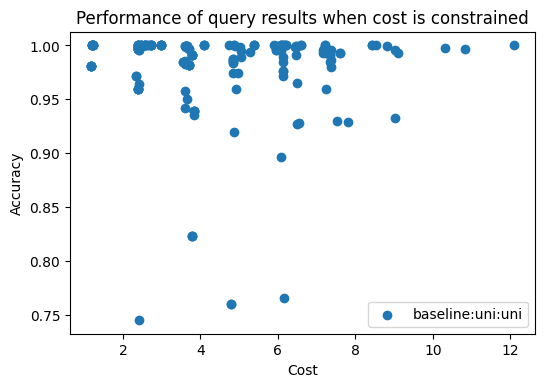

In [11]:
plt.rcParams['figure.dpi'] = 100
fig, ax = plt.subplots()

for i in [0]:#range(len(df_list)):
    ax.scatter(df_list[i]['cost'], df_list[i]['accuracy'],label=label_list[i])

plt.ylabel('Accuracy')
plt.xlabel('Cost')
plt.title('Performance of query results when cost is constrained')
plt.legend()

## Barplot on accuracy on different queries

In [27]:
df

,query_index,qgetSelectivityuery,#predicate,mdist,qdist,constraint,bound,approach,selected_model,pareto_model,#pareto,non_pareto_model,#non_pareto,pareto_ratio,accuracy,cost,optimization_time,data_process_time,query
0,3,NaN,2,uniform,uniform,cost,100.0,baseline_pareto,P1216.M1169|P1858.M1169,P1216.M1169|P1858.M1169,2,NaN,0,1.0,1.0,1.221094,0.0001,0.0038,P1216 | P1858
1,3,NaN,2,uniform,uniform,cost,150.0,baseline_pareto,P1216.M1169|P1858.M1169,P1216.M1169|P1858.M1169,2,NaN,0,1.0,1.0,1.221094,0.0001,0.0021,P1216 | P1858
2,3,NaN,2,uniform,uniform,cost,50.0,baseline_pareto,P1216.M1169|P1858.M1169,P1216.M1169|P1858.M1169,2,NaN,0,1.0,1.0,1.221094,0.0001,0.0018,P1216 | P1858
3,3,NaN,2,uniform,uniform,cost,100.0,baseline_pareto,P1216.M1169|P1858.M1169,P1216.M1169|P1858.M1169,2,NaN,0,1.0,1.0,1.221094,0.0000,0.0018,P1216 | P1858
4,3,NaN,2,uniform,uniform,cost,150.0,baseline_pareto,P1216.M1169|P1858.M1169,P1216.M1169|P1858.M1169,2,NaN,0,1.0,1.0,1.221094,0.0000,0.0021,P1216 | P1858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,28,NaN,8,uniform,uniform,cost,150.0,baseline_pareto,P406.M679|P1063.M1121|P863.M722|P681.M1160|P93...,P406.M679|P1063.M1121|P863.M722|P681.M1160|P93...,8,NaN,0,1.0,1.0,13.536239,0.0006,0.0020,(P932 & P681) | (P371 & P876) | (P1063 & P1323...
446,28,NaN,8,uniform,uniform,cost,50.0,baseline_pareto,P863.M722|P1063.M1121|P406.M679|P681.M1160|P93...,P863.M722|P1063.M1121|P406.M679|P681.M1160|P93...,8,NaN,0,1.0,1.0,13.536239,0.0007,0.0019,(P932 & P681) | (P371 & P876) | (P1063 & P1323...
447,28,NaN,8,uniform,uniform,cost,100.0,baseline_pareto,P1323.M1123|P406.M679|P1063.M1121|P681.M1160|P...,P1323.M1123|P406.M679|P1063.M1121|P681.M1160|P...,8,NaN,0,1.0,1.0,22.914525,0.0010,0.0022,(P932 & P681) | (P371 & P876) | (P1063 & P1323...
448,28,NaN,8,uniform,uniform,cost,150.0,baseline_pareto,P1323.M1123|P406.M679|P1063.M1121|P681.M1160|P...,P1323.M1123|P406.M679|P1063.M1121|P681.M1160|P...,8,NaN,0,1.0,1.0,16.503056,0.0009,0.0020,(P932 & P681) | (P371 & P876) | (P1063 & P1323...


In [20]:
import numpy as np

def barplot(q,df_list,ax,y,bound,legend=False):

    labels = ['baseline','basic_opt','order_opt']
#     subset = df_result[(df_result.query_index==idx) & (df_result.constraint==constraint) & (df_result.bound==bound)]

    real = []
    for i,l in enumerate(labels):
        df = df_list[i]
        subset = df[(df['query']==q) & (df.bound==bound)]# & (df.constraint=='cost') ]
#         print(subset[y])
        real.append(round(subset[y].values[0],2))

#     print(real)

    x = np.arange(len(labels))  # the label locations
    width = 0.3  # the width of the bars
    
#     rects1 = ax.bar(x - width/2, objective, width, label=labels[0])
    rects2 = ax.bar(x + width/2, real, width, label=labels[1])

    # Add some text for labels, title and custom x-axis tick labels, etc.
#     ax.set_ylabel('Accuracy')
    ax.set_title('Q'+str(idx+1))
    ax.set_xticks(x)
    if y == 'accuracy':
        ax.set_yticks([0.1, 0.5, 1.0])
    else:
        ax.set_yticks([0,150,220])
    ax.set_xticklabels(labels,rotation=45)
    if legend:
        ax.legend()

#     ax.bar_label(rects1, padding=2,fontsize=7,label_type='edge')
    ax.bar_label(rects2, padding=2,fontsize=7,label_type='edge')
    
#     ax.grid()


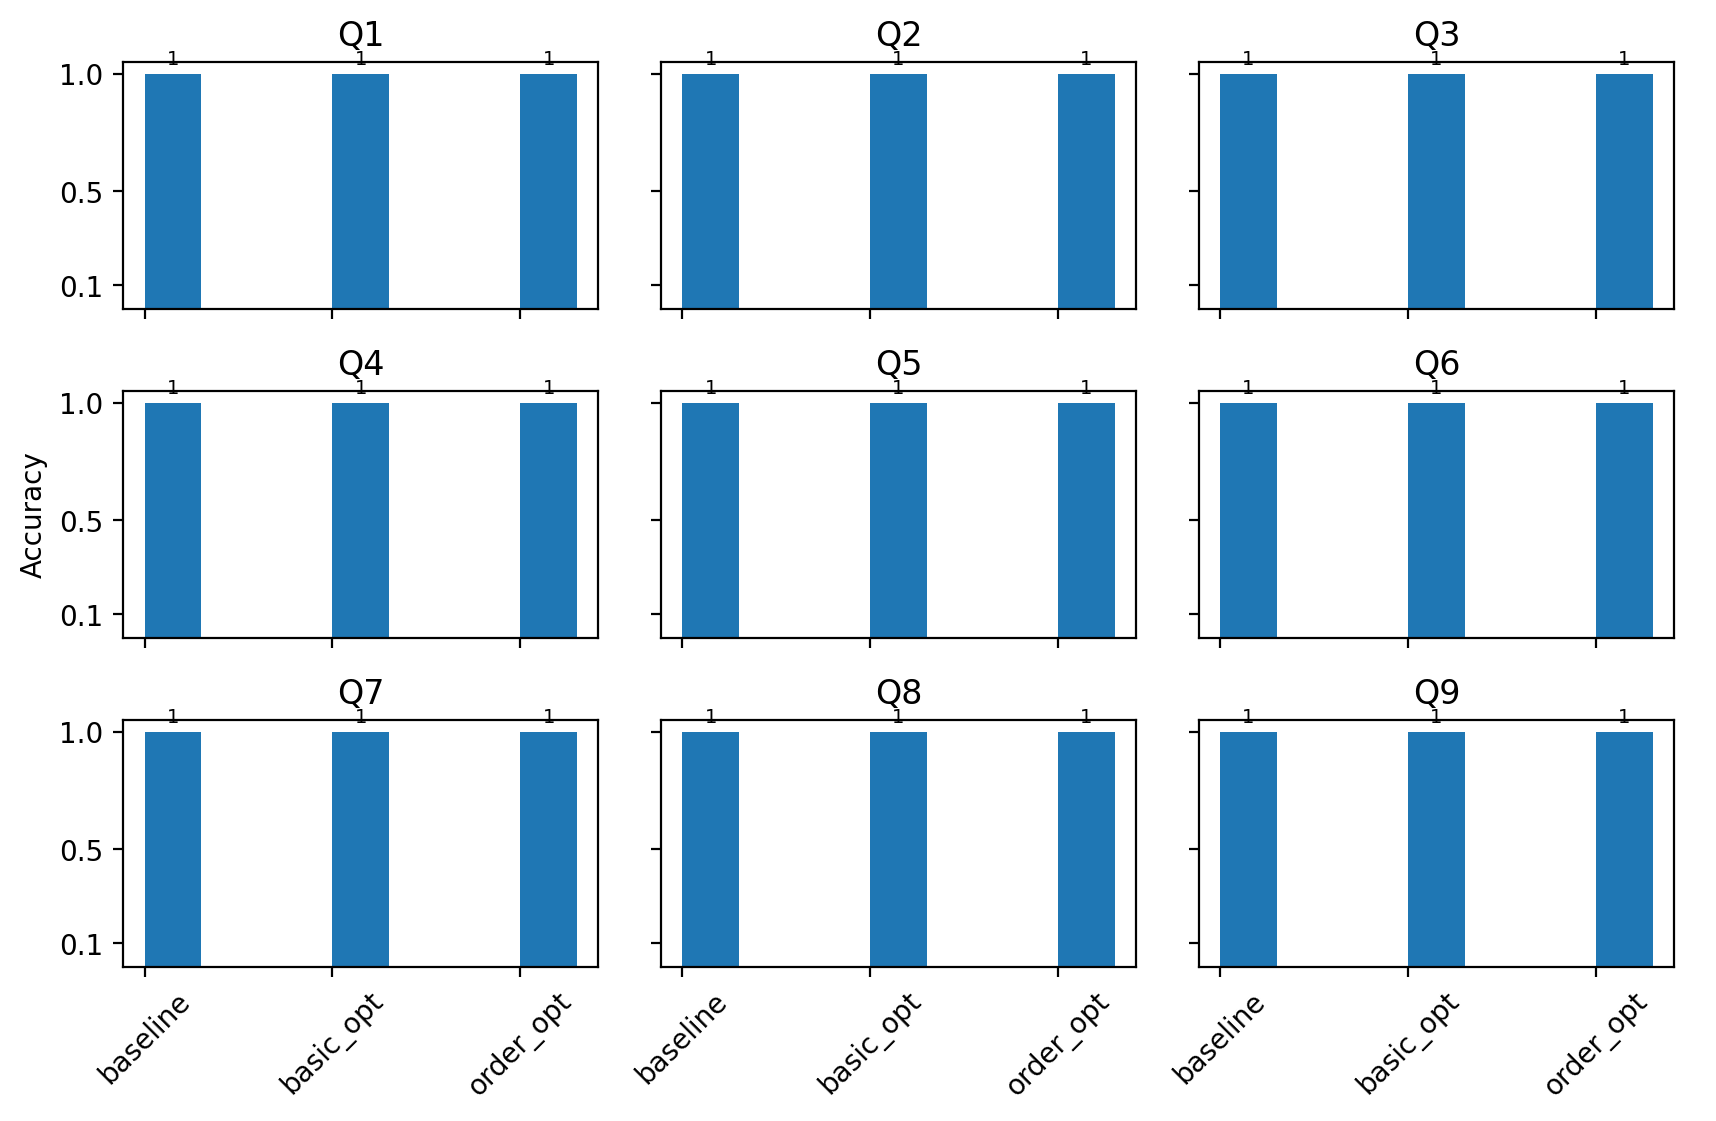

In [26]:
plt.rcParams['figure.dpi'] = 200
constraint = 'cost'
bound = 50
ncols = 3
f, axes = plt.subplots(nrows = 3, ncols = ncols, sharex=True, sharey = True,figsize=(9,6))

df = df_dict['baseline:uni:uni']
query = pd.Series(list(set(df[df['#predicate']==8]['query'])))
# query

for i,idx in enumerate(range(len(query))[:9]):
#     print(idx)
    q = query[idx]
#     print(q)
    df_base = df_dict['baseline:uni:uni']
    df_opt = df_dict['basic_opt:uni:uni']
    df_order = df_dict['order_opt:uni:uni']
    df_list = [df_base,df_opt,df_order]
    barplot(q,df_list,axes[i//ncols, i%ncols],y='accuracy',bound=bound,legend=False)

f.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.ylabel("Accuracy")
f.tight_layout()

IndexError: index 3 is out of bounds for axis 0 with size 3

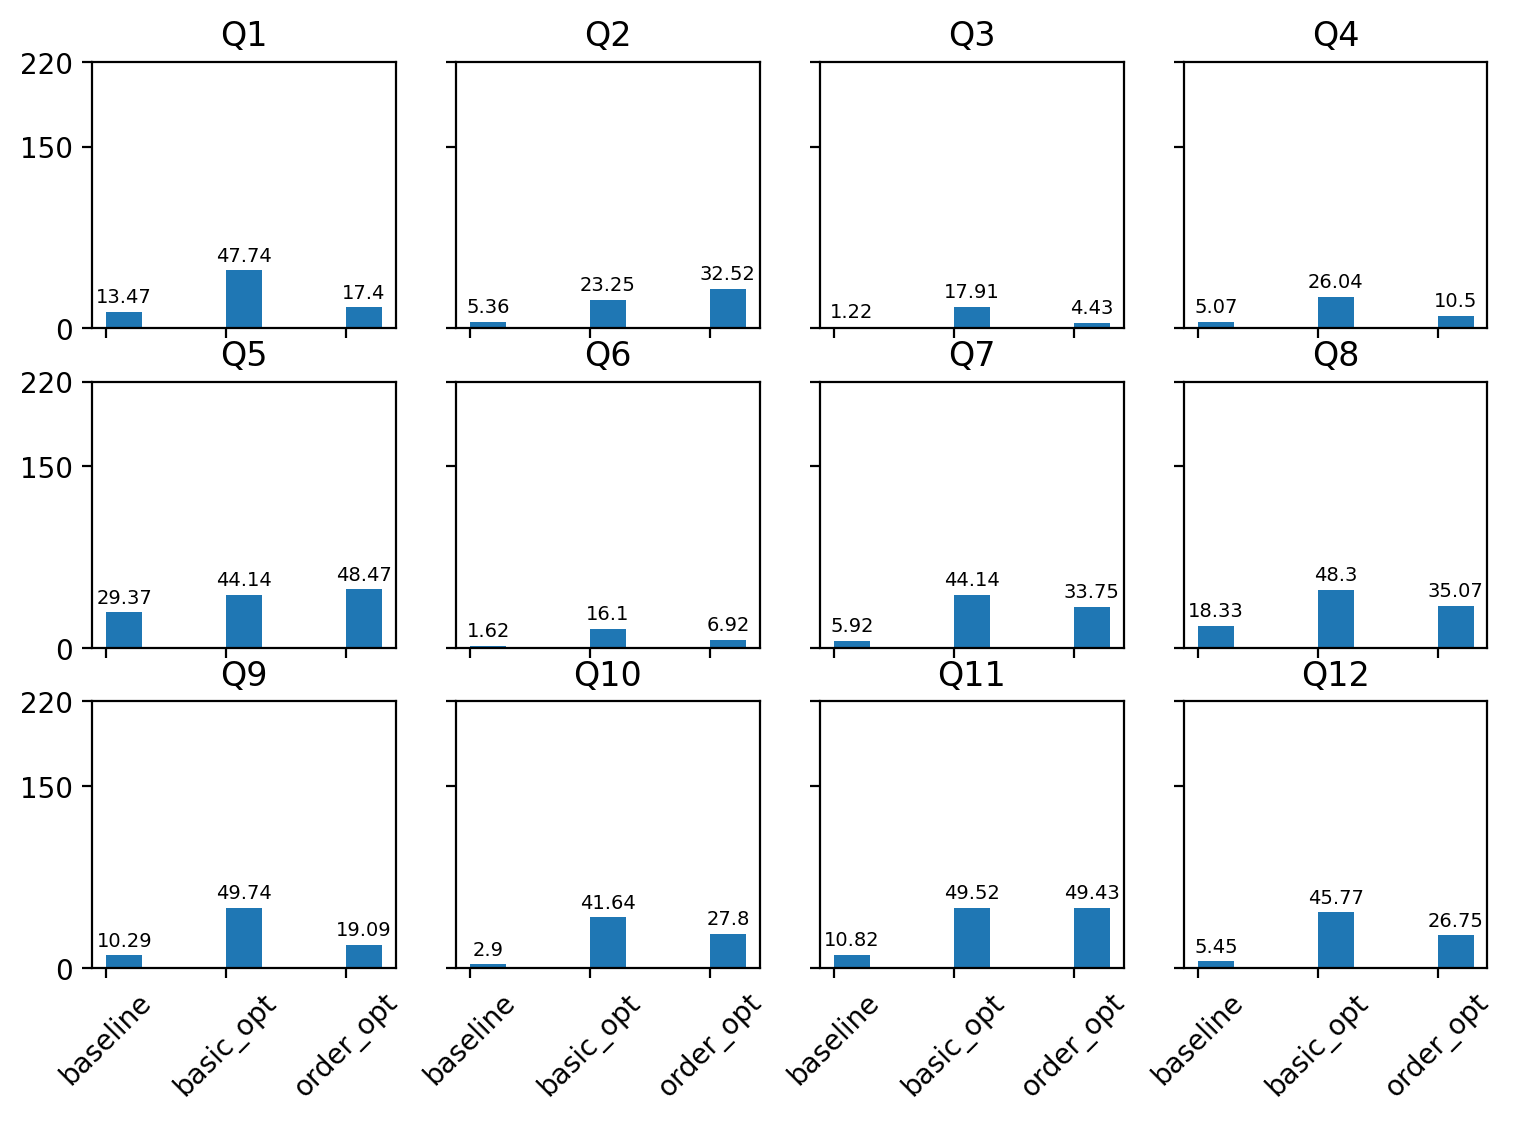

In [24]:
plt.rcParams['figure.dpi'] = 200
constraint = 'cost'
bound = 50
ncols = 4
f, axes = plt.subplots(nrows = 3, ncols = ncols, sharex=True, sharey = True,figsize=(9,6))

query = pd.Series(list(set(df_dict['baseline:uni:uni']['query'])))
# query

for i,idx in enumerate(range(len(query))):
#     print(idx)
    q = query[idx]
#     print(q)
    df_base = df_dict['baseline:uni:uni']
    df_opt = df_dict['basic_opt:uni:uni']
    df_order = df_dict['order_opt:uni:uni']
    df_list = [df_base,df_opt,df_order]
    barplot(q,df_list,axes[i//ncols, i%ncols],y='cost',bound=bound,legend=False)

f.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.ylabel("Accuracy")
f.tight_layout()

### Boxplot on the objective dimension: accuracy

In [9]:
def boxplot(com_dists,data,max_y=0,ylabel='Accuracy',constraint='Cost',size=14,path='',x_offset=0,y_offset=0):
    fig, ax1 = plt.subplots(figsize=(7, 6))
    fig.canvas.set_window_title('A Boxplot Example')
    fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

    bp = ax1.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+')

    # Add a horizontal grid to the plot, but make it very light in color
    # so we can use it for reading data values but not be distracting
    ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
                   alpha=0.5)

    ax1.set(
        axisbelow=True,  # Hide the grid behind plot objects
#         title=ylabel+' of query results when '+constraint+' is constrained',
        xlabel='Combinations (m_dist:q_dist)',
        ylabel=ylabel,
    )
    ax1.xaxis.get_label().set_fontsize(size)
    ax1.yaxis.get_label().set_fontsize(size)

    # Now fill the boxes with desired colors
    box_colors = ['#2694ab', '#e59572']
    num_boxes = len(data)
    medians = np.empty(num_boxes)
    means = [np.mean(x) for x in data]
#     print(means)
    # pylab.scatter(range(1,len(data)+1), means)

    for i in range(num_boxes):
        box = bp['boxes'][i]
        box_x = []
        box_y = []
        for j in range(5):
            box_x.append(box.get_xdata()[j])
            box_y.append(box.get_ydata()[j])
        box_coords = np.column_stack([box_x, box_y])
        # Alternate between Dark Khaki and Royal Blue
        ax1.add_patch(Polygon(box_coords, facecolor=box_colors[i % 2]))
        # Now draw the median lines back over what we just filled in
        med = bp['medians'][i]
        median_x = []
        median_y = []
        for j in range(2):
            median_x.append(med.get_xdata()[j])
            median_y.append(med.get_ydata()[j])
            ax1.plot(median_x, median_y, 'k')
        medians[i] = median_y[0]
        # Finally, overplot the sample averages, with horizontal alignment
        # in the center of each box
        ax1.plot(np.average(med.get_xdata()), np.average(data[i]),
                 color='w', marker='X', markeredgecolor='k',markersize=10)

    # Set the axes ranges and axes labels
    ax1.set_xlim(0.5, num_boxes + 0.5)
    top = max_y * 1.1
    bottom = 0
    ax1.set_ylim(bottom, top)
    ax1.set_xticklabels(np.repeat(comb_dists, 2),
                        rotation=45, fontsize=size)
    ax1.tick_params(labelsize=size)

    # Due to the Y-axis scale being different across samples, it can be
    # hard to compare differences in medians across the samples. Add upper
    # X-axis tick labels with the sample medians to aid in comparison
    # (just use two decimal places of precision)
    pos = np.arange(num_boxes) + 1
    # upper_labels = [str(round(s, 2)) for s in medians]
    upper_labels = [str(round(s, 3)) for i,s in enumerate(means)]
    weights = ['bold', 'semibold']
    for tick, label in zip(range(num_boxes), ax1.get_xticklabels()):
        k = tick % 2
        ax1.text(pos[tick], .95, upper_labels[tick],
                 transform=ax1.get_xaxis_transform(),
                 horizontalalignment='center', size='medium',
                 weight=weights[k], color=box_colors[k])
    # Valid font size are xx-small, x-small, small, medium, large, x-large, xx-large, larger, smaller, None
    # Finally, add a basic legend
    fig.text(0.79-x_offset, 0.461-y_offset, 'Baseline',
             backgroundcolor=box_colors[0], color='white', weight='roman',
             size='medium')
    fig.text(0.79-x_offset, 0.417-y_offset, 'Optimizer',
             backgroundcolor=box_colors[1],
             color='white', weight='roman', size='medium')
    fig.text(0.79-x_offset, 0.374-y_offset, 'x', color='white', backgroundcolor='silver',
             weight='roman', size='medium')
    fig.text(0.81-x_offset, 0.374-y_offset, ' Avg.', color='black', weight='roman',
             size='medium')
    plt.tight_layout()
    
    plt.savefig(path,format='eps')

    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


['uniform:uniform', 'power_law:uniform', 'uniform:power_law', 'power_law:power_law']
Accuracy of query results when cost is constrained
num_boxes 12


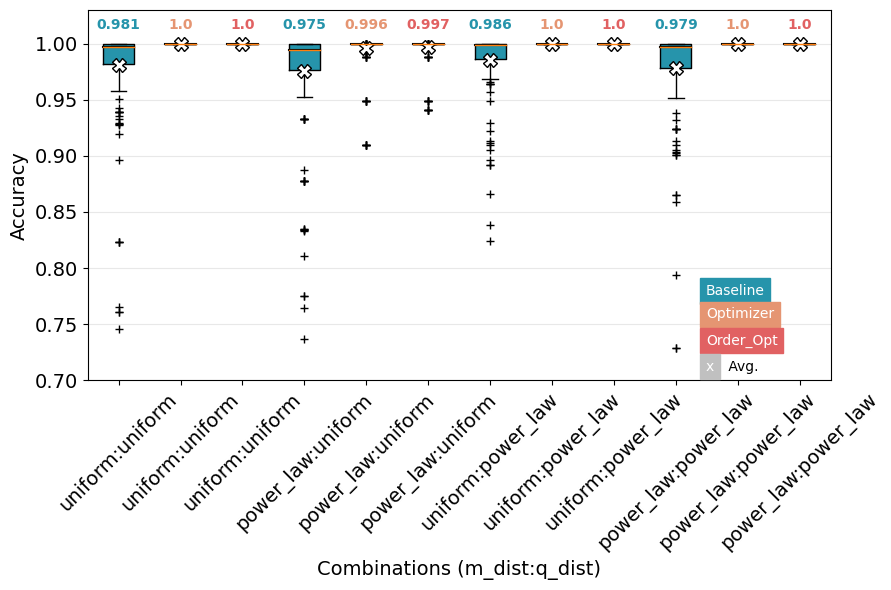

In [48]:
comb_dists = []
data = []
i=0
for q in q_dist:
    for m in m_dist:
        comb_dists.append(m+':'+q)
        for app in approach:
            data.append(df_list[i]['accuracy'])
            i+=1
print(comb_dists)
ylabel='Accuracy'
constraint='cost'
print(ylabel+' of query results when '+constraint+' is constrained')
boxplot(comb_dists,data,max_y=max(data[0]),
        ylabel='Accuracy',constraint='cost',
       path="image/accuacy_vs_approaches_constraint_cost.eps")


## Boxplot two optimizer

In [44]:
def boxplot(com_dists,data,max_y=0,ylabel='Accuracy',constraint='Cost',size=14,path='',x_offset=0,y_offset=0):
    fig, ax1 = plt.subplots(figsize=(9, 6))
    fig.canvas.set_window_title('A Boxplot Example')
    fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

    bp = ax1.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+')

    # Add a horizontal grid to the plot, but make it very light in color
    # so we can use it for reading data values but not be distracting
    ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
                   alpha=0.5)

    ax1.set(
        axisbelow=True,  # Hide the grid behind plot objects
#         title=ylabel+' of query results when '+constraint+' is constrained',
        xlabel='Combinations (m_dist:q_dist)',
        ylabel=ylabel,
    )
    ax1.xaxis.get_label().set_fontsize(size)
    ax1.yaxis.get_label().set_fontsize(size)

    # Now fill the boxes with desired colors
    box_colors = ['#2694ab', '#e59572','#e16162']
    num_boxes = len(data)
    medians = np.empty(num_boxes)
    means = [np.mean(x) for x in data]
#     print(means)
    # pylab.scatter(range(1,len(data)+1), means)
    print('num_boxes',num_boxes)
    for i in range(num_boxes):
        box = bp['boxes'][i]
        box_x = []
        box_y = []
#         print(box.get_xdata())
#         print(box.get_ydata())
        for j in range(5):
            box_x.append(box.get_xdata()[j])
            box_y.append(box.get_ydata()[j])
        box_coords = np.column_stack([box_x, box_y])
        # Alternate between Dark Khaki and Royal Blue
        ax1.add_patch(Polygon(box_coords, facecolor=box_colors[i % 3]))
        # Now draw the median lines back over what we just filled in
        med = bp['medians'][i]
        median_x = []
        median_y = []
        for j in range(2):
            median_x.append(med.get_xdata()[j])
            median_y.append(med.get_ydata()[j])
            ax1.plot(median_x, median_y, 'k')
        medians[i] = median_y[0]
        # Finally, overplot the sample averages, with horizontal alignment
        # in the center of each box
        ax1.plot(np.average(med.get_xdata()), np.average(data[i]),
                 color='w', marker='X', markeredgecolor='k',markersize=10)

    # Set the axes ranges and axes labels
    ax1.set_xlim(0.5, num_boxes + 0.5)
    top = max_y * 1.03
    bottom = 0.7
    ax1.set_ylim(bottom, top)
    ax1.set_xticklabels(np.repeat(comb_dists, 3),
                        rotation=45, fontsize=size)
    ax1.tick_params(labelsize=size)

    # Due to the Y-axis scale being different across samples, it can be
    # hard to compare differences in medians across the samples. Add upper
    # X-axis tick labels with the sample medians to aid in comparison
    # (just use two decimal places of precision)
    pos = np.arange(num_boxes) + 1
    # upper_labels = [str(round(s, 2)) for s in medians]
    upper_labels = [str(round(s, 3)) for i,s in enumerate(means)]
    weights = ['bold', 'semibold','semibold']
    for tick, label in zip(range(num_boxes), ax1.get_xticklabels()):
        k = tick % 3
        ax1.text(pos[tick], .95, upper_labels[tick],
                 transform=ax1.get_xaxis_transform(),
                 horizontalalignment='center', size='medium',
                 weight=weights[k], color=box_colors[k])
    # Valid font size are xx-small, x-small, small, medium, large, x-large, xx-large, larger, smaller, None
    # Finally, add a basic legend
    fig.text(0.79-x_offset, 0.5-y_offset, 'Baseline',
             backgroundcolor=box_colors[0], color='white', weight='roman',
             size='medium')
    fig.text(0.79-x_offset, 0.461-y_offset, 'Optimizer',
             backgroundcolor=box_colors[1], color='white', weight='roman',
             size='medium')
    fig.text(0.79-x_offset, 0.417-y_offset, 'Order_Opt',
             backgroundcolor=box_colors[2],
             color='white', weight='roman', size='medium')
    fig.text(0.79-x_offset, 0.374-y_offset, 'x', color='white', backgroundcolor='silver',
             weight='roman', size='medium')
    fig.text(0.81-x_offset, 0.374-y_offset, ' Avg.', color='black', weight='roman',
             size='medium')
    plt.tight_layout()
    
    plt.savefig(path,format='eps')

    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


['uniform:uniform', 'power_law:uniform', 'uniform:power_law', 'power_law:power_law']
Accuracy of query results when cost is constrained
num_boxes 12


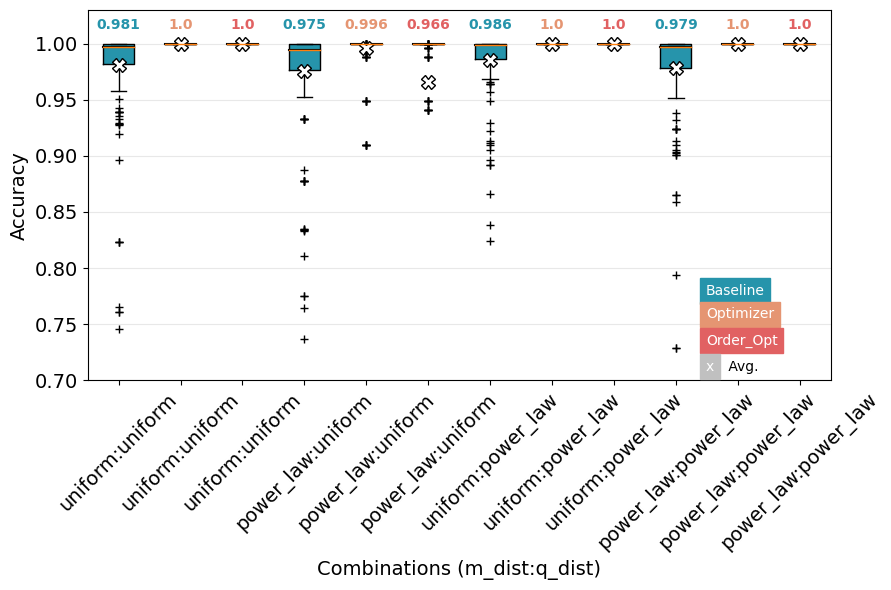

In [45]:
comb_dists = []
data = []
i=0
for q in q_dist:
    for m in m_dist:
        comb_dists.append(m+':'+q)
        for app in approach:
            data.append(df_list[i]['accuracy'])
            i+=1
print(comb_dists)
ylabel='Accuracy'
constraint='cost'
print(ylabel+' of query results when '+constraint+' is constrained')
boxplot(comb_dists,data,max_y=max(data[0]),
        ylabel='Accuracy',constraint='cost',
       path="image/accuacy_vs_approaches_constraint_cost.eps")

## Pareto

In [111]:
def boxplot(com_dists,data,max_y=0,ylabel='Accuracy',constraint='Cost',size=14,path='',x_offset=0,y_offset=0):
    fig, ax1 = plt.subplots(figsize=(9, 6))
    fig.canvas.set_window_title('A Boxplot Example')
    fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

    bp = ax1.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+')

    # Add a horizontal grid to the plot, but make it very light in color
    # so we can use it for reading data values but not be distracting
    ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
                   alpha=0.5)

    ax1.set(
        axisbelow=True,  # Hide the grid behind plot objects
#         title=ylabel+' of query results when '+constraint+' is constrained',
        xlabel='Combinations (m_dist:q_dist)',
        ylabel=ylabel,
    )
    ax1.xaxis.get_label().set_fontsize(size)
    ax1.yaxis.get_label().set_fontsize(size)

    # Now fill the boxes with desired colors
    box_colors = ['#2694ab', '#e59572','#e16162']
    num_boxes = len(data)
    medians = np.empty(num_boxes)
    means = [np.mean(x) for x in data]
#     print(means)
    # pylab.scatter(range(1,len(data)+1), means)
    print('num_boxes',num_boxes)
    for i in range(num_boxes):
        box = bp['boxes'][i]
        box_x = []
        box_y = []
#         print(box.get_xdata())
#         print(box.get_ydata())
        for j in range(5):
            box_x.append(box.get_xdata()[j])
            box_y.append(box.get_ydata()[j])
        box_coords = np.column_stack([box_x, box_y])
        # Alternate between Dark Khaki and Royal Blue
        ax1.add_patch(Polygon(box_coords, facecolor=box_colors[i % 3]))
        # Now draw the median lines back over what we just filled in
        med = bp['medians'][i]
        median_x = []
        median_y = []
        for j in range(2):
            median_x.append(med.get_xdata()[j])
            median_y.append(med.get_ydata()[j])
            ax1.plot(median_x, median_y, 'k')
        medians[i] = median_y[0]
        # Finally, overplot the sample averages, with horizontal alignment
        # in the center of each box
        ax1.plot(np.average(med.get_xdata()), np.average(data[i]),
                 color='w', marker='X', markeredgecolor='k',markersize=10)

    # Set the axes ranges and axes labels
    ax1.set_xlim(0.5, num_boxes + 0.5)
    top = max_y * 1.1
    bottom = 0
    ax1.set_ylim(bottom, top)
    ax1.set_xticklabels(np.repeat(comb_dists, 3),
                        rotation=45, fontsize=size)
    ax1.tick_params(labelsize=size)

    # Due to the Y-axis scale being different across samples, it can be
    # hard to compare differences in medians across the samples. Add upper
    # X-axis tick labels with the sample medians to aid in comparison
    # (just use two decimal places of precision)
    pos = np.arange(num_boxes) + 1
    # upper_labels = [str(round(s, 2)) for s in medians]
    upper_labels = [str(round(s, 3)) for i,s in enumerate(means)]
    weights = ['bold', 'semibold','semibold']
    for tick, label in zip(range(num_boxes), ax1.get_xticklabels()):
        k = tick % 3
        ax1.text(pos[tick], .95, upper_labels[tick],
                 transform=ax1.get_xaxis_transform(),
                 horizontalalignment='center', size='medium',
                 weight=weights[k], color=box_colors[k])
    # Valid font size are xx-small, x-small, small, medium, large, x-large, xx-large, larger, smaller, None
    # Finally, add a basic legend
    fig.text(0.89-x_offset, 0.8-y_offset, 'Baseline',
             backgroundcolor=box_colors[0], color='white', weight='roman',
             size='medium')
    fig.text(0.89-x_offset, 0.761-y_offset, 'Optimizer',
             backgroundcolor=box_colors[1], color='white', weight='roman',
             size='medium')
    fig.text(0.89-x_offset, 0.717-y_offset, 'Order_Opt',
             backgroundcolor=box_colors[2],
             color='white', weight='roman', size='medium')
    fig.text(0.89-x_offset, 0.674-y_offset, 'x', color='white', backgroundcolor='silver',
             weight='roman', size='medium')
    fig.text(0.91-x_offset, 0.674-y_offset, ' Avg.', color='black', weight='roman',
             size='medium')
    plt.tight_layout()
    
    plt.savefig(path,format='eps')

    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


['uniform:uniform', 'power_law:uniform', 'uniform:power_law', 'power_law:power_law']
num_boxes 12


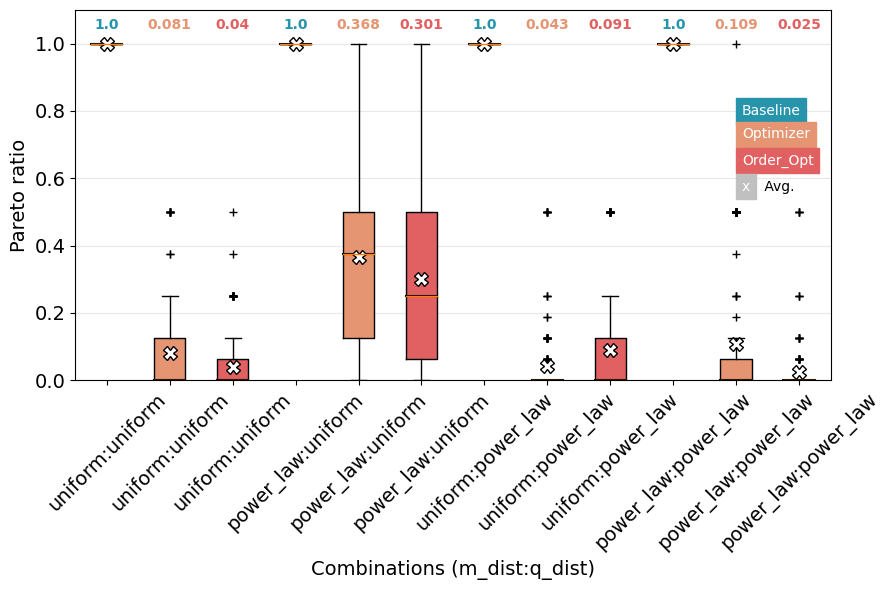

In [112]:
q_dist = ['uniform','power_law']
m_dist = q_dist
approach = ['baseline_pareto','optimizer','order_opt']

comb_dists = []
data = []
i = 0
for q in q_dist:
    for m in m_dist:
        comb_dists.append(m+':'+q)
        for app in approach:
            data.append(df_list[i]['pareto_ratio'])
            i+=1
print(comb_dists)

boxplot(comb_dists,data,max_y=max([max(x) for x in data]),
        ylabel='Pareto ratio',constraint='cost', x_offset=0.06,
       path='image/pareto_vs_approaches_constraint_cost.eps')

In [19]:
q_dist = ['uniform','power_law']
m_dist = q_dist
approach = ['baseline_pareto','optimizer']


comb_dists = []
data = []
i=0

for a,app in enumerate(approach):
    for i,m in enumerate(m_dist):
        for j,q in enumerate(q_dist):
            if app == 'baseline_pareto':
                app = 'baseline'
            comb_dists.append(app+'-'+m+':'+q)
            data.append(df_list[4*i+2*j+a][['#predicate','optimization_time']])
print(comb_dists)

['baseline-uniform:uniform', 'baseline-uniform:power_law', 'baseline-power_law:uniform', 'baseline-power_law:power_law', 'optimizer-uniform:uniform', 'optimizer-uniform:power_law', 'optimizer-power_law:uniform', 'optimizer-power_law:power_law']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


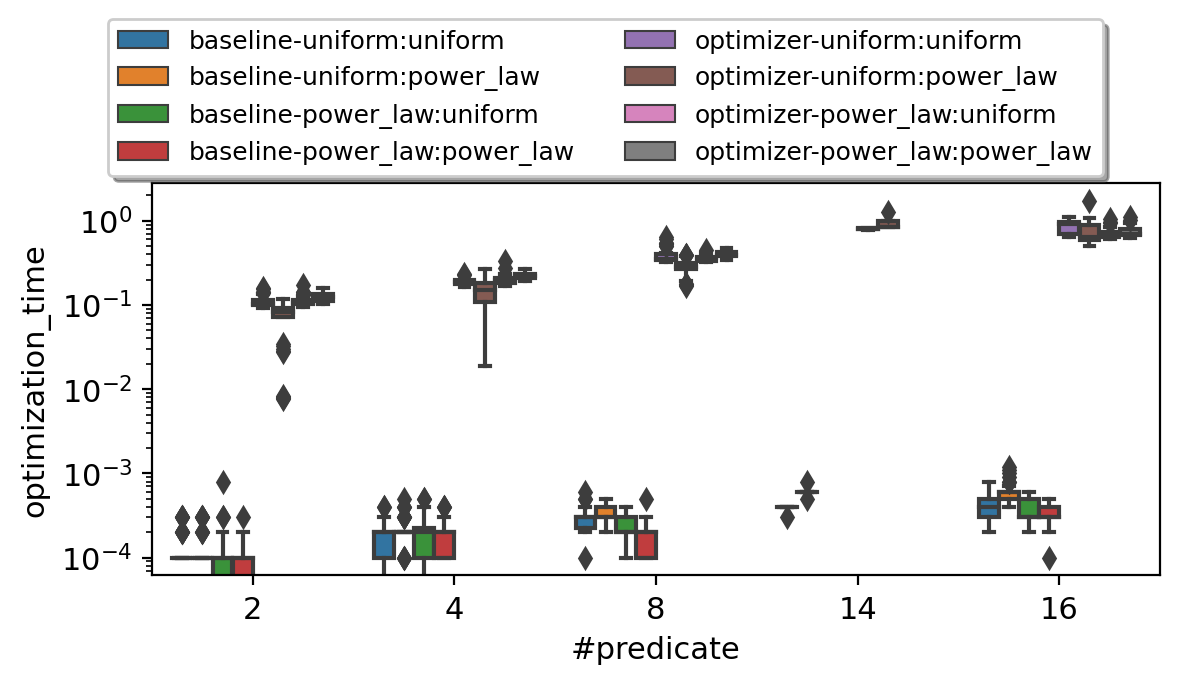

In [21]:
import seaborn as sns
plt.rcParams['figure.dpi'] = 200
df = pd.DataFrame(columns=['#predicate','approach','optimization_time'])

for i,d in enumerate(data):
    d.loc[d['#predicate']==15,'#predicate']= 16
    d.loc[30-d['#predicate']<5,'#predicate'] = 32
    d['approach'] = [comb_dists[i]]*len(d)
    df = df.append(d,ignore_index=True)

    
# dd=pd.melt(df,id_vars=['#predicate'],value_vars=['Apple','Orange'],var_name='fruits')
g = sns.boxplot(x='#predicate',y='optimization_time',data=df,hue='approach')
# g.set_title("Runtime against #predicate in a query when constrained on cost",fontsize=8)
# plt.legend(bbox_to_anchor=(0.9, 0.8))
g.legend(loc='upper center', bbox_to_anchor=(0.45, 1.45),
          ncol=2, fancybox=True, shadow=True,prop={'size': 9})
g.set_yscale("log")
g.tick_params(labelsize=11)
g.xaxis.get_label().set_fontsize(11)
g.yaxis.get_label().set_fontsize(11)
plt.tight_layout()
plt.savefig('image/runtime_vs_approaches_constraint_cost.eps',format='eps')

In [22]:
q_dist = ['uniform','power_law']
m_dist = q_dist
approach = ['baseline_pareto','optimizer']

comb_dists = []
data = []
i=0
for m in m_dist:
    for q in q_dist:
        comb_dists.append(m+':'+q)
        data.append(df_list[i*2+1][['#predicate','optimization_time']])
        i+=1
print(comb_dists)

['uniform:uniform', 'uniform:power_law', 'power_law:uniform', 'power_law:power_law']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


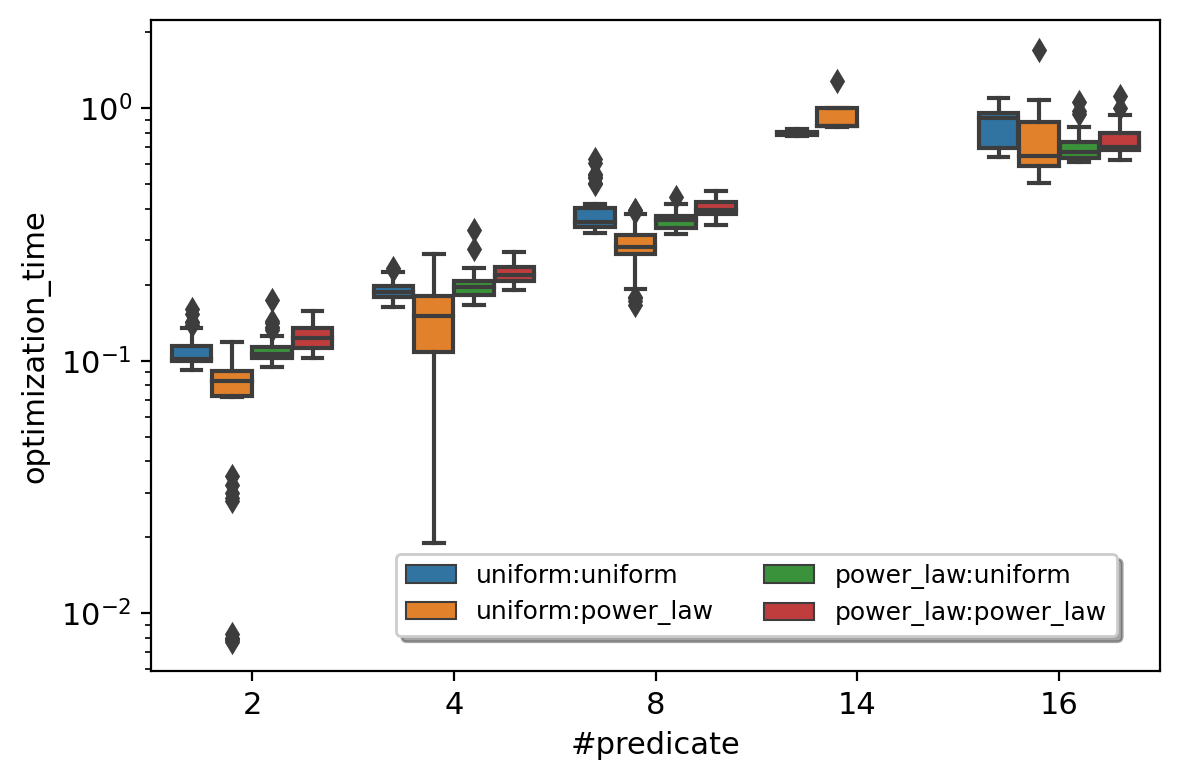

In [26]:
plt.rcParams['figure.dpi'] = 200
df = pd.DataFrame(columns=['#predicate','optimizer','optimization_time'])

for i,d in enumerate(data):
    d.loc[d['#predicate']==15,'#predicate']= 16
    d.loc[30-d['#predicate']<5,'#predicate'] = 32
    d['optimizer'] = [comb_dists[i]]*len(d)
    df = df.append(d,ignore_index=True)

# dd=pd.melt(df,id_vars=['#predicate'],value_vars=['Apple','Orange'],var_name='fruits')
g = sns.boxplot(x='#predicate',y='optimization_time',data=df,hue='optimizer')
# g.set_title("Runtime against #predicate in a query when constrained on cost",fontsize=8)
g.legend(loc='upper center', bbox_to_anchor=(0.6, 0.2),
          ncol=2, fancybox=True, shadow=True,prop={'size': 9})
g.set_yscale("log")

g.tick_params(labelsize=11)
g.xaxis.get_label().set_fontsize(11)
g.yaxis.get_label().set_fontsize(11)
plt.tight_layout()
plt.savefig('image/runtime_vs_optimizers_constraint_cost.eps',format='eps')

['baseline_pareto', 'optimizer']
(342, 3)
  #predicate         approach  optimization_time
0          2  baseline_pareto             0.0001
1          2  baseline_pareto             0.0001
2          2  baseline_pareto             0.0000
3          2  baseline_pareto             0.0001
4          2  baseline_pareto             0.0001


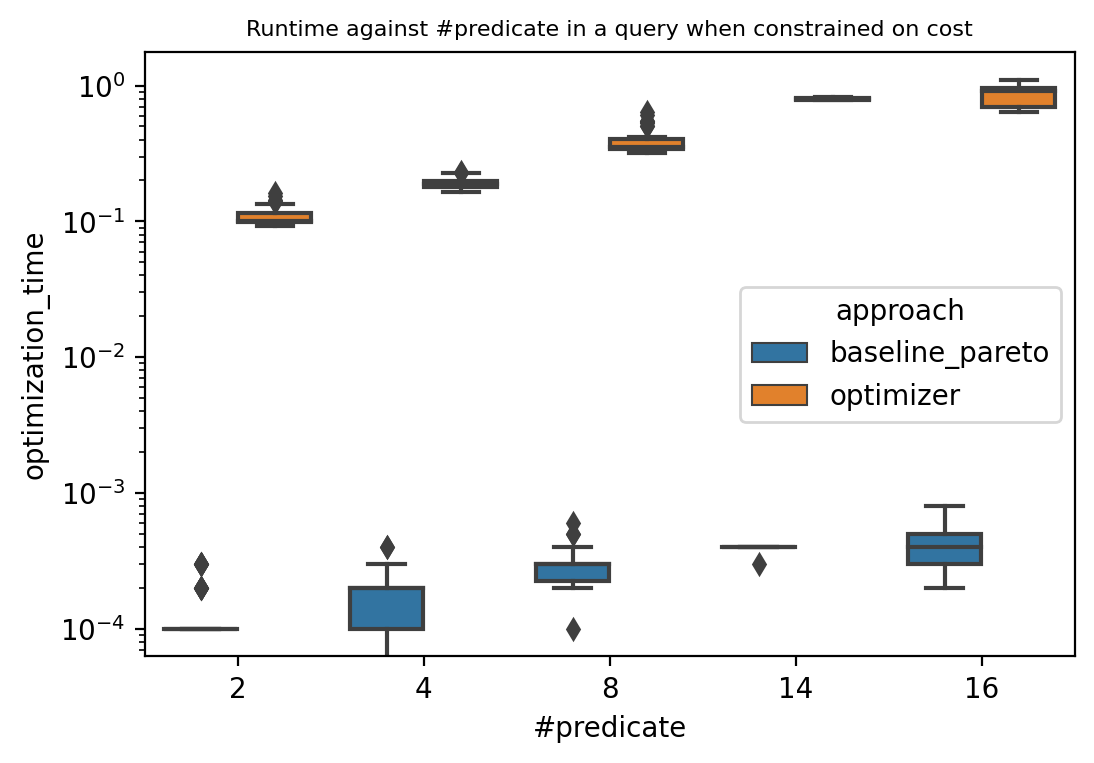

In [28]:
q_dist = ['uniform']
m_dist = q_dist
approach = ['baseline_pareto','optimizer']

def load(m_dist,q_dist,approach):
    filepath = 'output/summary_cost_'+m_dist+'_'+q_dist+'_'+approach+'.csv'
    df = pd.read_csv(filepath,index_col=0)
#     print(df.head())
    return df[['#predicate','optimization_time']]

comb_dists = []
data = []
i=0
for m in m_dist:
    for q in q_dist:
        for app in approach:
            comb_dists.append(app)
            data.append(df_list[i][['#predicate','optimization_time']])
            i+=1
print(comb_dists)

plt.rcParams['figure.dpi'] = 200
df = pd.DataFrame(columns=['#predicate','approach','optimization_time'])

for i,d in enumerate(data):
    d.loc[d['#predicate']==15,'#predicate']= 16
    d.loc[30-d['#predicate']<5,'#predicate'] = 32
    d['approach'] = [comb_dists[i]]*len(d)
    df = df.append(d,ignore_index=True)
    
print(df.shape)
print(df.head())
    
# dd=pd.melt(df,id_vars=['#predicate'],value_vars=['Apple','Orange'],var_name='fruits')
g = sns.boxplot(x='#predicate',y='optimization_time',data=df,hue='approach')
g.set_title("Runtime against #predicate in a query when constrained on cost",fontsize=8)
g.set_yscale("log")

## Constraint on accuracy, minmize cost

In [ ]:
q_dist = ['uniform','power_law']
m_dist = q_dist
approach = ['baseline_pareto','optimizer']


def load_accu(m_dist,q_dist,approach):
    filepath = 'output/summary_accuracy_'+m_dist+'_'+q_dist+'_'+approach+'.csv'
    df = pd.read_csv(filepath,index_col=0)
    print(df.shape)
#     print(df.head())
    return df

df_list = []
label_list = []
for q in q_dist:
    for m in m_dist:
        for app in approach:
            df_list.append(load_accu(m,q,app))
            label_list.append(app+'_'+m+'_'+q)
print(label_list)

In [89]:
q_dist = ['uniform','power_law']
m_dist = q_dist
approach = ['baseline_pareto','optimizer','order_opt']


def load_cost(m_dist,q_dist,approach):
    filepath = 'output/summary_accuracy_'+m_dist+'_'+q_dist+'_'+approach+'.csv'
    if approach == 'order_opt':
        filepath = 'output/summary_order_accuracy_'+m_dist+'_'+q_dist+'_optimizer.csv'
    try:
        df = pd.read_csv(filepath,index_col=0)
    except Exception as e:
        filepath = 'output/summary_cost_'+m_dist+'_'+q_dist+'_'+approach+'_a=5.csv'
        df = pd.read_csv(filepath,index_col=0)
        
    print(df.shape)
#     print(df.head())
    return df

df_list = []
label_list = []
for q in q_dist:
    for m in m_dist:
        for app in approach:
            df_list.append(load_cost(m,q,app))
            if app == 'baseline_pareto':
                app = 'baseline'
            label_list.append(app+'_'+m+'_'+q)
print(label_list)

(190, 17)
(190, 17)
(21, 17)
(228, 17)
(90, 17)
(41, 17)
(160, 17)
(256, 17)
(18, 17)
(160, 17)
(160, 17)
(49, 17)
['baseline_uniform_uniform', 'optimizer_uniform_uniform', 'order_opt_uniform_uniform', 'baseline_power_law_uniform', 'optimizer_power_law_uniform', 'order_opt_power_law_uniform', 'baseline_uniform_power_law', 'optimizer_uniform_power_law', 'order_opt_uniform_power_law', 'baseline_power_law_power_law', 'optimizer_power_law_power_law', 'order_opt_power_law_power_law']


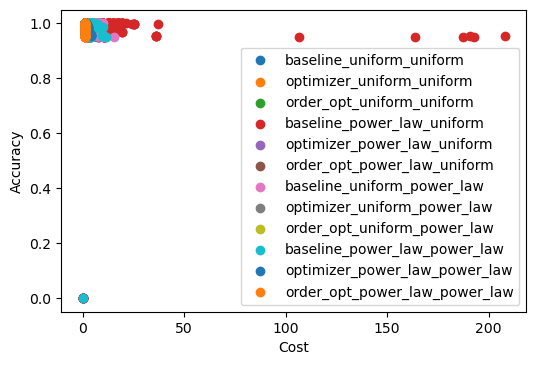

In [54]:
plt.rcParams['figure.dpi'] = 100
fig, ax = plt.subplots()

for i in range(len(df_list)):
    ax.scatter(df_list[i]['cost'], df_list[i]['accuracy'],label=label_list[i])

plt.ylabel('Accuracy')
plt.xlabel('Cost')
# plt.yscale('logit')
plt.legend()

In [90]:
def boxplot(com_dists,data,max_y=0,ylabel='Accuracy',constraint='Cost',size=14,path='',x_offset=0,y_offset=0):
    fig, ax1 = plt.subplots(figsize=(9, 6))
    fig.canvas.set_window_title('A Boxplot Example')
    fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

    bp = ax1.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+')

    # Add a horizontal grid to the plot, but make it very light in color
    # so we can use it for reading data values but not be distracting
    ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
                   alpha=0.5)

    ax1.set(
        axisbelow=True,  # Hide the grid behind plot objects
#         title=ylabel+' of query results when '+constraint+' is constrained',
        xlabel='Combinations (m_dist:q_dist)',
        ylabel=ylabel,
    )
    ax1.xaxis.get_label().set_fontsize(size)
    ax1.yaxis.get_label().set_fontsize(size)

    # Now fill the boxes with desired colors
    box_colors = ['#2694ab', '#e59572','#e16162']
    num_boxes = len(data)
    medians = np.empty(num_boxes)
    means = [np.mean(x) for x in data]
#     print(means)
    # pylab.scatter(range(1,len(data)+1), means)
    print('num_boxes',num_boxes)
    for i in range(num_boxes):
        box = bp['boxes'][i]
        box_x = []
        box_y = []
#         print(box.get_xdata())
#         print(box.get_ydata())
        for j in range(5):
            box_x.append(box.get_xdata()[j])
            box_y.append(box.get_ydata()[j])
        box_coords = np.column_stack([box_x, box_y])
        # Alternate between Dark Khaki and Royal Blue
        ax1.add_patch(Polygon(box_coords, facecolor=box_colors[i % 3]))
        # Now draw the median lines back over what we just filled in
        med = bp['medians'][i]
        median_x = []
        median_y = []
        for j in range(2):
            median_x.append(med.get_xdata()[j])
            median_y.append(med.get_ydata()[j])
            ax1.plot(median_x, median_y, 'k')
        medians[i] = median_y[0]
        # Finally, overplot the sample averages, with horizontal alignment
        # in the center of each box
        ax1.plot(np.average(med.get_xdata()), np.average(data[i]),
                 color='w', marker='X', markeredgecolor='k',markersize=10)

    # Set the axes ranges and axes labels
    ax1.set_xlim(0.5, num_boxes + 0.5)
    top = max_y * 0.2
    bottom = 0
    ax1.set_ylim(bottom, top)
    ax1.set_xticklabels(np.repeat(comb_dists, 3),
                        rotation=45, fontsize=size)
    ax1.tick_params(labelsize=size)

    # Due to the Y-axis scale being different across samples, it can be
    # hard to compare differences in medians across the samples. Add upper
    # X-axis tick labels with the sample medians to aid in comparison
    # (just use two decimal places of precision)
    pos = np.arange(num_boxes) + 1
    # upper_labels = [str(round(s, 2)) for s in medians]
    upper_labels = [str(round(s, 3)) for i,s in enumerate(means)]
    weights = ['bold', 'semibold','semibold']
    for tick, label in zip(range(num_boxes), ax1.get_xticklabels()):
        k = tick % 3
        ax1.text(pos[tick], .95, upper_labels[tick],
                 transform=ax1.get_xaxis_transform(),
                 horizontalalignment='center', size='medium',
                 weight=weights[k], color=box_colors[k])
    # Valid font size are xx-small, x-small, small, medium, large, x-large, xx-large, larger, smaller, None
    # Finally, add a basic legend
#     ax1.set_yscale('log')
    fig.text(0.79-x_offset, 0.5-y_offset, 'Baseline   ',
             backgroundcolor=box_colors[0], color='white', weight='roman',
             size='medium')
    fig.text(0.79-x_offset, 0.461-y_offset, 'Optimizer ',
             backgroundcolor=box_colors[1], color='white', weight='roman',
             size='medium')
    fig.text(0.79-x_offset, 0.417-y_offset, 'Order_Opt',
             backgroundcolor=box_colors[2],
             color='white', weight='roman', size='medium')
    fig.text(0.79-x_offset, 0.374-y_offset, 'x', color='white', backgroundcolor='silver',
             weight='roman', size='medium')
    fig.text(0.81-x_offset, 0.374-y_offset, ' Avg.', color='black', weight='roman',
             size='medium')
    plt.tight_layout()
    
    plt.savefig(path,format='eps')

    plt.show()

['uniform:uniform', 'power_law:uniform', 'uniform:power_law', 'power_law:power_law']
num_boxes 12


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


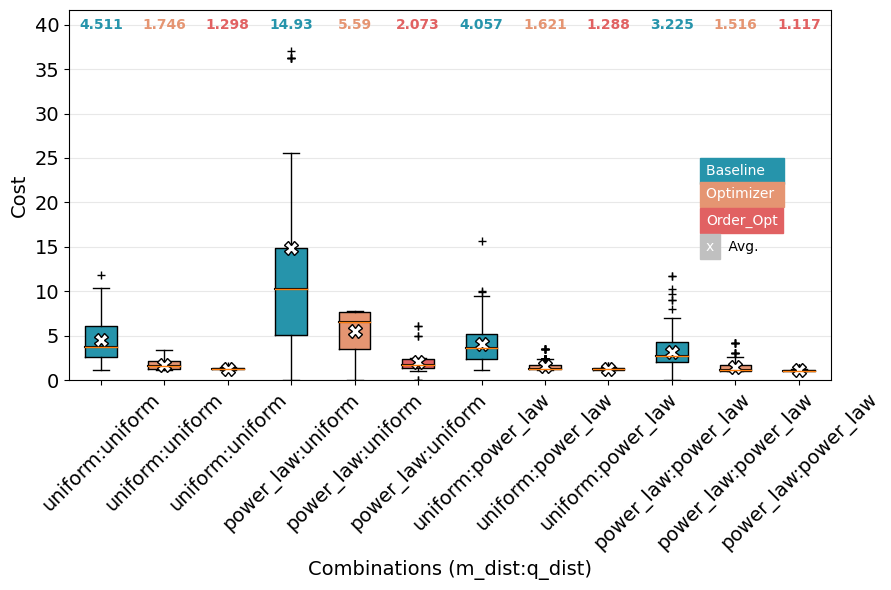

In [91]:

comb_dists = []
data = []
i=0
for q in q_dist:
    for m in m_dist:
        comb_dists.append(m+':'+q)
        for app in approach:
            data.append(df_list[i]['cost'])
            i+=1
print(comb_dists)

boxplot(comb_dists,data,max_y=max([max(x) for x in data]),
        ylabel='Cost',constraint='accuracy',
       path='image/cost_vs_approaches_constraint_accu.eps',
       y_offset=-0.2)

## Pareto ratio

In [92]:
def boxplot(com_dists,data,max_y=0,ylabel='Accuracy',constraint='Cost',size=14,path='',x_offset=0,y_offset=0):
    fig, ax1 = plt.subplots(figsize=(9, 6))
    fig.canvas.set_window_title('A Boxplot Example')
    fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

    bp = ax1.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+')

    # Add a horizontal grid to the plot, but make it very light in color
    # so we can use it for reading data values but not be distracting
    ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
                   alpha=0.5)

    ax1.set(
        axisbelow=True,  # Hide the grid behind plot objects
#         title=ylabel+' of query results when '+constraint+' is constrained',
        xlabel='Combinations (m_dist:q_dist)',
        ylabel=ylabel,
    )
    ax1.xaxis.get_label().set_fontsize(size)
    ax1.yaxis.get_label().set_fontsize(size)

    # Now fill the boxes with desired colors
    box_colors = ['#2694ab', '#e59572','#e16162']
    num_boxes = len(data)
    medians = np.empty(num_boxes)
    means = [np.mean(x) for x in data]
#     print(means)
    # pylab.scatter(range(1,len(data)+1), means)
    print('num_boxes',num_boxes)
    for i in range(num_boxes):
        box = bp['boxes'][i]
        box_x = []
        box_y = []
#         print(box.get_xdata())
#         print(box.get_ydata())
        for j in range(5):
            box_x.append(box.get_xdata()[j])
            box_y.append(box.get_ydata()[j])
        box_coords = np.column_stack([box_x, box_y])
        # Alternate between Dark Khaki and Royal Blue
        ax1.add_patch(Polygon(box_coords, facecolor=box_colors[i % 3]))
        # Now draw the median lines back over what we just filled in
        med = bp['medians'][i]
        median_x = []
        median_y = []
        for j in range(2):
            median_x.append(med.get_xdata()[j])
            median_y.append(med.get_ydata()[j])
            ax1.plot(median_x, median_y, 'k')
        medians[i] = median_y[0]
        # Finally, overplot the sample averages, with horizontal alignment
        # in the center of each box
        ax1.plot(np.average(med.get_xdata()), np.average(data[i]),
                 color='w', marker='X', markeredgecolor='k',markersize=10)

    # Set the axes ranges and axes labels
    ax1.set_xlim(0.5, num_boxes + 0.5)
    top = max_y * 1.1
    bottom = 0
    ax1.set_ylim(bottom, top)
    ax1.set_xticklabels(np.repeat(comb_dists, 3),
                        rotation=45, fontsize=size)
    ax1.tick_params(labelsize=size)

    # Due to the Y-axis scale being different across samples, it can be
    # hard to compare differences in medians across the samples. Add upper
    # X-axis tick labels with the sample medians to aid in comparison
    # (just use two decimal places of precision)
    pos = np.arange(num_boxes) + 1
    # upper_labels = [str(round(s, 2)) for s in medians]
    upper_labels = [str(round(s, 3)) for i,s in enumerate(means)]
    weights = ['bold', 'semibold','semibold']
    for tick, label in zip(range(num_boxes), ax1.get_xticklabels()):
        k = tick % 3
        ax1.text(pos[tick], .95, upper_labels[tick],
                 transform=ax1.get_xaxis_transform(),
                 horizontalalignment='center', size='medium',
                 weight=weights[k], color=box_colors[k])
    # Valid font size are xx-small, x-small, small, medium, large, x-large, xx-large, larger, smaller, None
    # Finally, add a basic legend
    fig.text(0.79-x_offset, 0.5-y_offset, 'Baseline',
             backgroundcolor=box_colors[0], color='white', weight='roman',
             size='medium')
    fig.text(0.79-x_offset, 0.461-y_offset, 'Optimizer',
             backgroundcolor=box_colors[1], color='white', weight='roman',
             size='medium')
    fig.text(0.79-x_offset, 0.417-y_offset, 'Order_Opt',
             backgroundcolor=box_colors[2],
             color='white', weight='roman', size='medium')
    fig.text(0.79-x_offset, 0.374-y_offset, 'x', color='white', backgroundcolor='silver',
             weight='roman', size='medium')
    fig.text(0.81-x_offset, 0.374-y_offset, ' Avg.', color='black', weight='roman',
             size='medium')
    plt.tight_layout()
    
    plt.savefig(path,format='eps')

    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


['uniform:uniform', 'power_law:uniform', 'uniform:power_law', 'power_law:power_law']
num_boxes 12


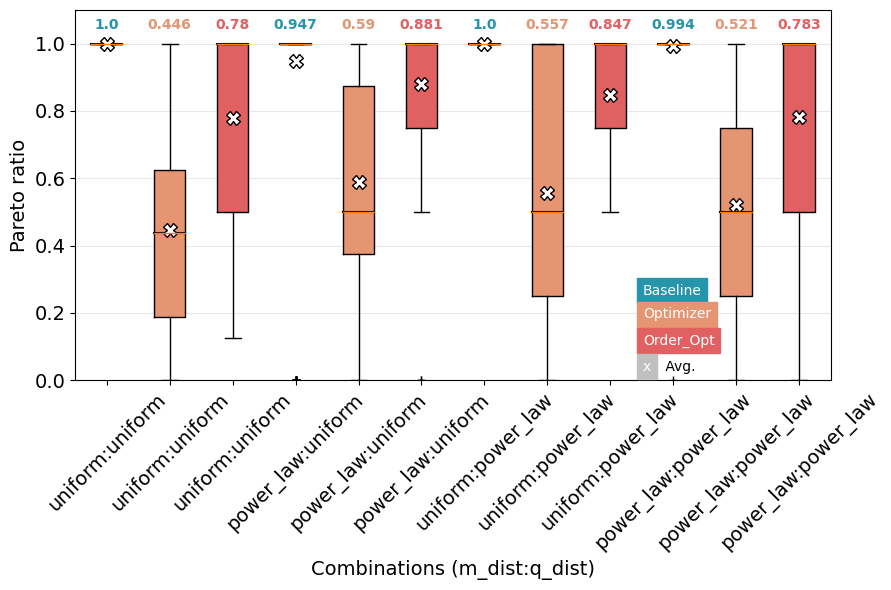

In [95]:
q_dist = ['uniform','power_law']
m_dist = q_dist
approach = ['baseline_pareto','optimizer','order_opt']


comb_dists = []
data = []
i=0
for q in q_dist:
    for m in m_dist:
        comb_dists.append(m+':'+q)
        for app in approach:
            data.append(df_list[i]['pareto_ratio'])
            i+=1
print(comb_dists)

boxplot(comb_dists,data,max_y=max([max(x) for x in data]),
        ylabel='Pareto ratio',constraint='cost',
        path='image/pareto_vs_approaches_constraint_cost.eps',
       x_offset=0.07)

### Runtime

In [440]:
q_dist = ['uniform','power_law']
m_dist = q_dist

def load(m_dist,q_dist,approach):
    filepath = 'repository/run_summary_accuracy_'+m_dist+'_'+q_dist+'_'+approach+'.csv'
    df = pd.read_csv(filepath,index_col=0)
#     print(df.head())
    return df[['#predicate','optimization_time']]

comb_dists = []
data = []
i=0
for m in m_dist:
    for q in q_dist:
        comb_dists.append(m+':'+q)
        data.append(df_list[i*2+1][['#predicate','optimization_time']])
        i+=1
print(comb_dists)


['uniform:uniform', 'uniform:power_law', 'power_law:uniform', 'power_law:power_law']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


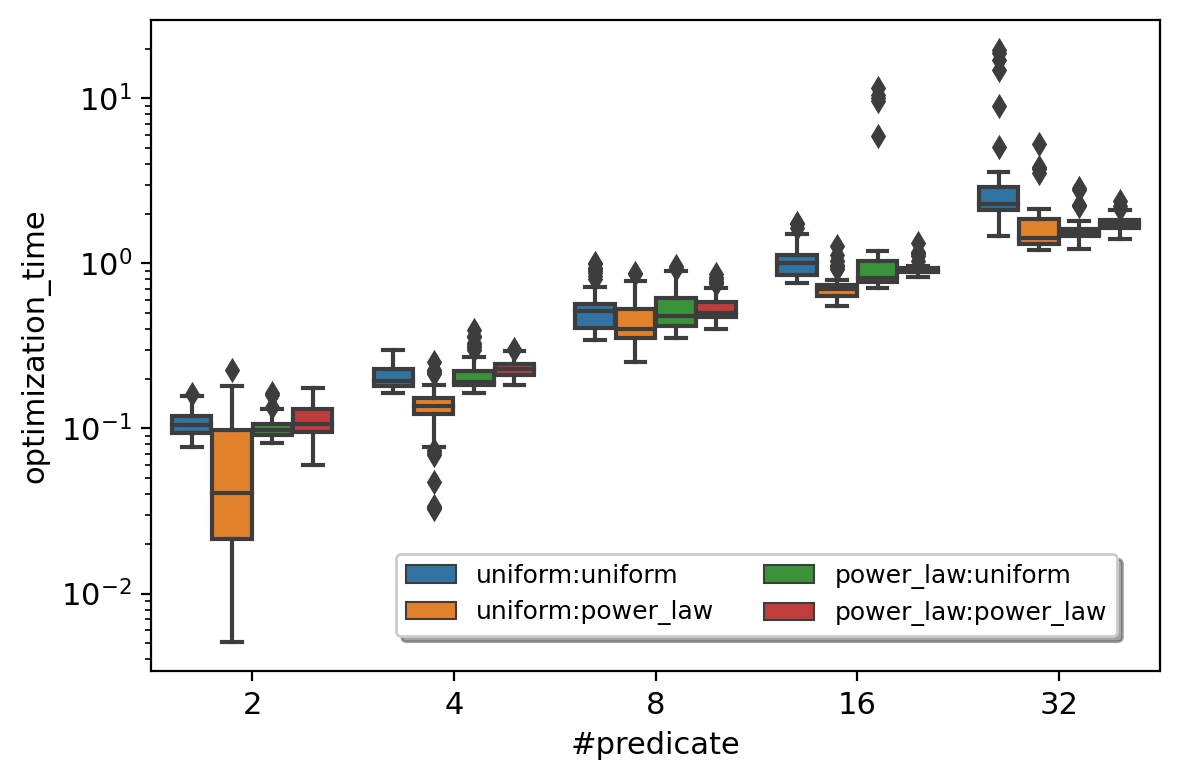

In [443]:
plt.rcParams['figure.dpi'] = 200
df = pd.DataFrame(columns=['#predicate','optimizer','optimization_time'])

for i,d in enumerate(data):
    d.loc[d['#predicate']==15,'#predicate']= 16
    d.loc[30-d['#predicate']<5,'#predicate'] = 32
    d['optimizer'] = [comb_dists[i]]*len(d)
    df = df.append(d,ignore_index=True)

# dd=pd.melt(df,id_vars=['#predicate'],value_vars=['Apple','Orange'],var_name='fruits')
g = sns.boxplot(x='#predicate',y='optimization_time',data=df,hue='optimizer')
# g.set_title("Runtime against #predicate in a query when constrained on accuarcy",fontsize=8)
g.set_yscale("log")
g.legend(loc='upper center', bbox_to_anchor=(0.6, 0.2),
          ncol=2, fancybox=True, shadow=True,prop={'size': 9})
g.set_yscale("log")

g.tick_params(labelsize=11)
g.xaxis.get_label().set_fontsize(11)
g.yaxis.get_label().set_fontsize(11)
plt.tight_layout()
plt.savefig('image/runtime_vs_optimizers_constraint_accu.eps',format='eps')

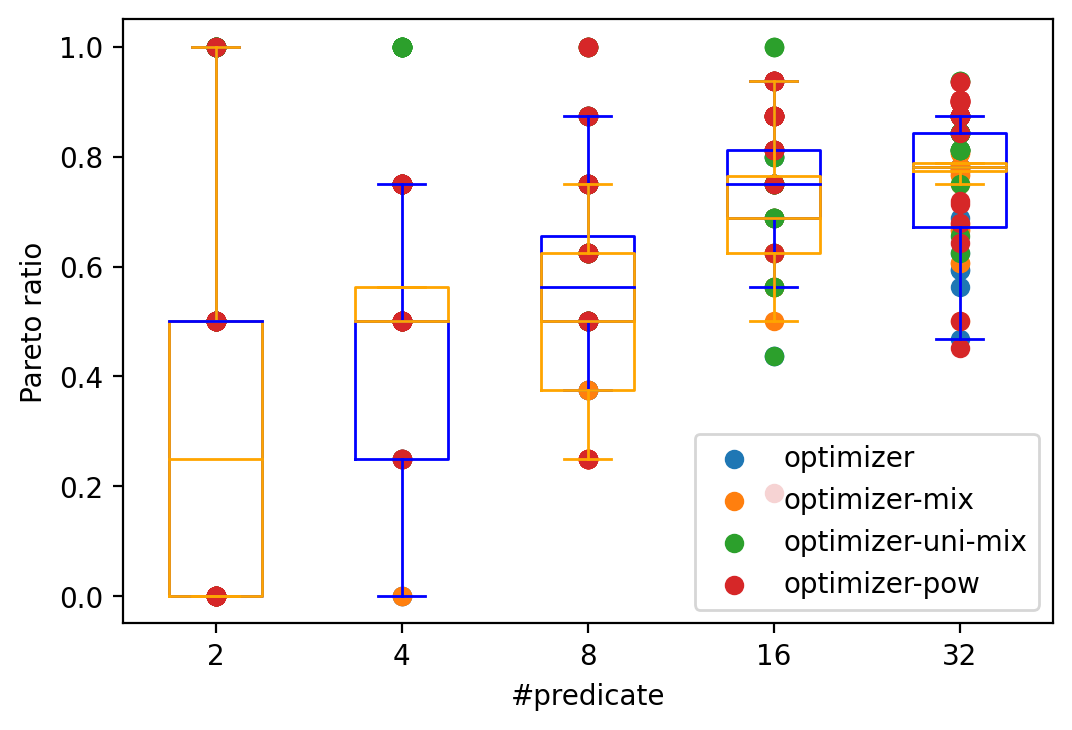

In [55]:
fig, ax = plt.subplots()
ax.scatter(x_optimizer,_optimizer['pareto_ratio'],label='optimizer')
ax.scatter(x_mix_optimizer,mix_optimizer['pareto_ratio'],label='optimizer-mix')
ax.scatter(x_uni_mix_optimizer,uni_mix_optimizer['pareto_ratio'],label='optimizer-uni-mix')
ax.scatter(x_pow_optimizer,pow_optimizer['pareto_ratio'],label='optimizer-pow')

# rectangular box plot
bplot1 = ax.boxplot([_optimizer[_optimizer['#predicate']==k]['pareto_ratio'] for k in [2,4,8,16,32]],
                     showfliers=False,
                     vert=True,  # vertical box alignment
                     labels=range(5)) 
c1 = "blue"
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(bplot1[item], color=c1)

bplot1 = ax.boxplot([mix_optimizer[mix_optimizer['#predicate']==k]['pareto_ratio'] for k in [2,4,8,16,32]],
                     showfliers=False,
                     vert=True,  # vertical box alignment
                     labels=range(5)) 
c2 = "orange"
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(bplot1[item], color=c2)
    
# bplot1 = ax.boxplot([x_uni_mix_optimizer[x_uni_mix_optimizer['#predicate']==k]['pareto_ratio'] for k in [2,4,8,16,32]],
#                      showfliers=False,
#                      vert=True,  # vertical box alignment
#                      labels=range(5)) 

# c2 = "orange"
# for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
#     plt.setp(bplot1[item], color=c2)
    
plt.xticks(range(1,6),key)
plt.ylabel('Pareto ratio')
plt.xlabel('#predicate')
plt.legend()

In [ ]:
def boxplot(data,query_range):
    box_colors = ['darkkhaki', 'royalblue']
    fig, ax = plt.subplots()
    ax.set_title('Pareto Ratio')
    bp = ax.boxplot(data)
    plt.xticks(range(1,len(query_range)+1), query_range)
    plt.xlabel("#queries")
    plt.ylabel("Pareto ratio")
    plt.show()

## Runtime

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x_baseline, _baseline['runtime'],label='baseline')
ax.scatter(x_optimizer,_optimizer['pareto_ratio'],c='orange',label='optimizer')
# rectangular box plot
bplot1 = ax.boxplot([_baseline[_baseline['#predicate']==k]['pareto_ratio'] for k in key],
                     notch=True,
                     vert=True,  # vertical box alignment
                     showfliers=False,
                     labels=range(5))  # will be used to label x-ticks
c1 = "blue"
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(bplot1[item], color=c1)

bplot1 = ax.boxplot([_optimizer[_optimizer['#predicate']==k]['pareto_ratio'] for k in key],
                     showfliers=False,
                     vert=True,  # vertical box alignment
                     labels=range(5)) 
c2 = "orange"
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(bplot1[item], color=c2)
plt.xticks(range(1,6),key)
plt.ylabel('Pareto ratio')
plt.xlabel('#predicate')
plt.legend()

## YOLOV3 converted performance

In [4]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from pandas.plotting import andrews_curves
import pylab
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [6]:
q_dist = ['uniform','power_law']
m_dist = q_dist

filepath = '/Users/lizy/my_doc/PhD/Code/Project_Boolean_ML_Optimization/yolov3/convert/model_stats.csv'
filepath = 'repository/model_repository_uniform.csv'
df_convert =  pd.read_csv(filepath,index_col=0)

# base_cost = [165,1560]
# cost = df_convert['cost']
# cost = [round(16*(c-base_cost[0])+base_cost[0]) if c < 1000 else round(16*(c-base_cost[1])+base_cost[1]) for c in cost]
# df_convert['cost'] = cost
# df_convert.to_csv('/Users/lizy/my_doc/PhD/Code/Project_Boolean_ML_Optimization/yolov3/convert/model_stats_new.csv')

columns = df_convert.columns
classes = [c for c in columns if c != 'cost']

df_accu = df_convert.loc[:,classes]
cost = df_convert['cost']
print(list(cost))
df_accu.head()

[28.0, 15.0, 33.0, 56.0, 65.0, 60.0, 191.0, 3.9, 0.1, 27.0, 59.0, 15.0, 46.0, 11.2, 138.0, 143.0, 187.0, 6.6, 25.0, 62.0, 27.88370066565797, 17.634509802974833, 7.784747461929975, 9.892587742620464, 24.231684863324, 15.38472562082518, 6.287865283676164, 10.023346835972264, 14.580290763319876, 24.582733120342755, 2.7299966553167967, 26.464622478130067, 10.701690460701837, 4.681887758469307, 9.899733989044103, 14.204659867567635, 3.4688213688934093, 15.23399292364, 6.742383004344951, 19.89151978038816, 15.497632743772712, 25.120771685008968, 4.192084924523541, 8.17282326467247, 16.88426490540587, 24.356418594140283, 3.8668845521625546, 15.673969958898065, 25.60898035777626, 4.464832461216437, 26.679068527206354, 12.246480096591474, 2.9055794891196363, 9.615339343830982, 17.404851170660198, 3.2544664567343085, 8.505329913256439, 26.007411740549895, 16.716886526889333, 27.13467571582105, 26.035761643579036, 26.288582302762666, 11.75728869789378, 26.515592943450926, 14.994563537764824, 20.0

,person,bicycle,car,motorcycle,airplane,bus,train,truck,boat,traffic light,...,hen-of-the-woods,hen of the woods,Polyporus frondosus,Grifola frondosa,ear,spike,capitulum,toilet tissue,toilet paper,bathroom tissue
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8_obj,0.775475,0.609524,0.710345,0.684211,0.668449,0.753138,0.641593,0.527687,0.632035,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ssd_mobilenet_v2_320x320_coco17_tpu-8_obj,0.709911,0.537037,0.583053,0.607407,0.750000,0.645455,0.731579,0.486607,0.561224,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ssd_resnet50_v1_fpn_640x640_coco17_tpu-8_obj,0.936210,0.901786,0.875616,0.899497,0.938596,0.882051,0.912409,0.790698,0.918182,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
efficientdet_d7_coco17_tpu-32_obj,0.954582,0.930851,0.907407,0.944238,0.975610,0.934211,0.973856,0.844221,0.920000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mask_rcnn_inception_resnet_v2_1024x1024_coco17_gpu-8_obj,0.830052,0.731915,0.761962,0.841216,0.871622,0.825397,0.827027,0.585799,0.708215,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_accu.shape

(200, 79)

In [17]:
df_class = df_accu.notnull().sum()
df_class = df_class.sort_values()
print(df_class.head())

kite          20
scissors      21
train         22
suitcase      23
wine glass    24
dtype: int64


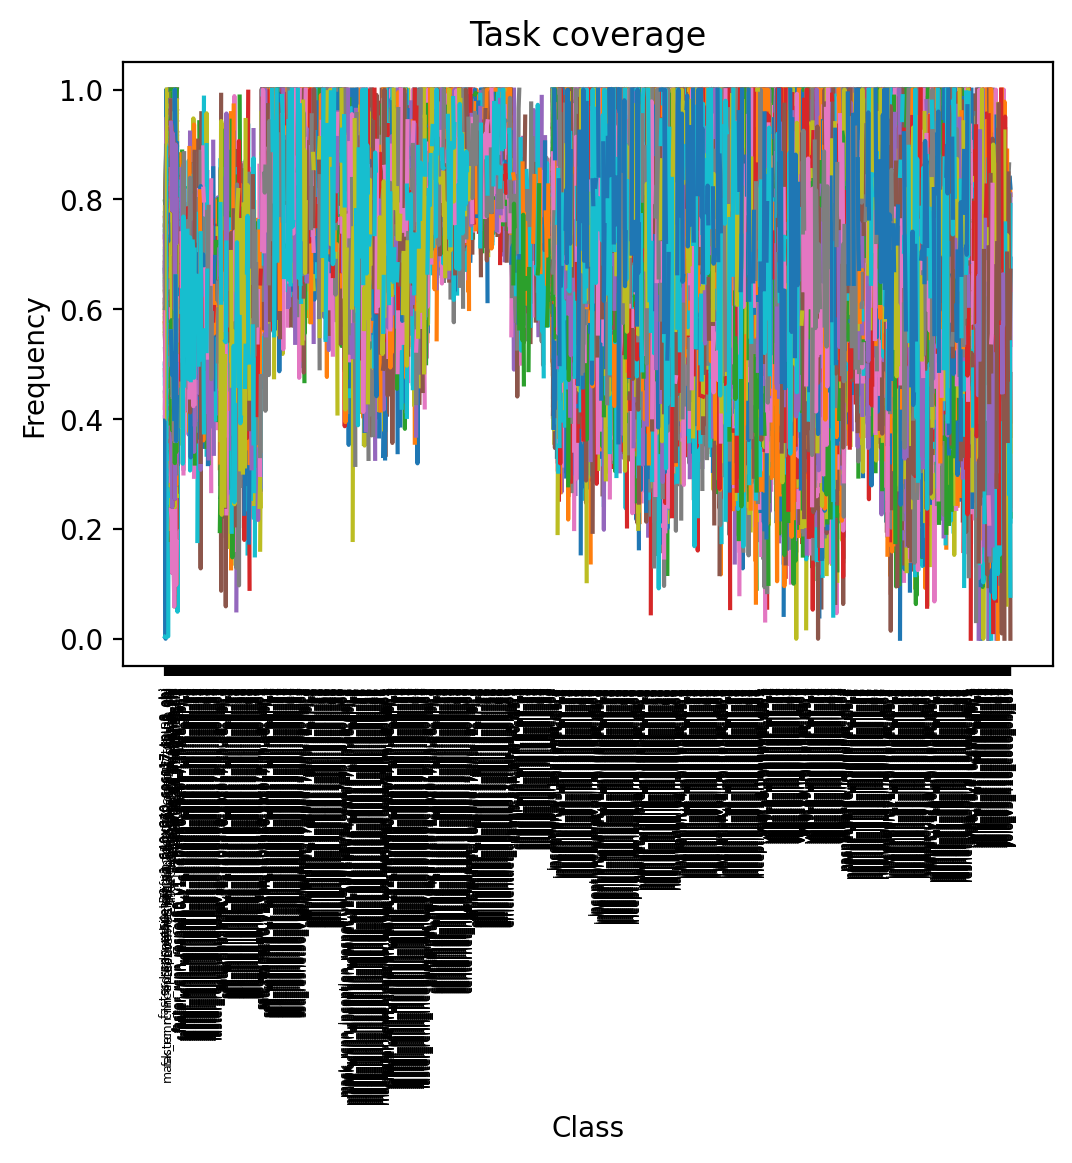

In [10]:
plt.rcParams['figure.dpi'] = 200

fig, ax = plt.subplots()
plt.plot(df_accu)
plt.title('Task coverage')
plt.xlabel('Class')
plt.ylabel('Frequency')
ax.set_xticklabels(labels=df_accu.index,rotation=90, fontsize=4.5)
plt.show()

In [19]:
df_accu['cost'] = cost
print(df_accu.shape)
df_accu.head()

(200, 80)


,frisbee,fork,snowboard,banana,teddy bear,tie,car,oven,bear,zebra,...,giraffe,microwave,toothbrush,wine glass,truck,remote,traffic light,tv,suitcase,cost
model_64,0.771778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131.4
model_175,NaN,0.887560,0.444227,0.468642,1.0,0.718676,0.670483,0.373577,0.724548,0.846801,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.8
model_45,0.725862,NaN,NaN,0.497260,NaN,NaN,0.717433,NaN,0.868305,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.4
model_159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.8
model_154,0.801371,0.682536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.844418,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.8


In [20]:
# df_accu.to_csv(filepath)

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

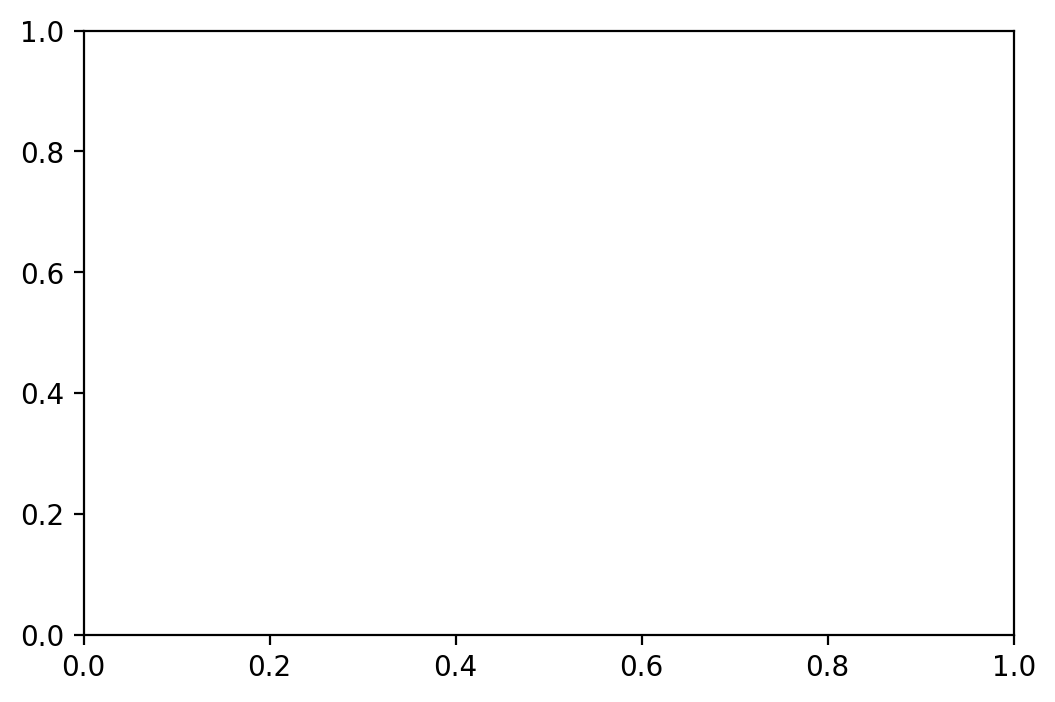

In [11]:
plt.rcParams['figure.dpi'] = 200

def plot(df,T):
    fig, ax = plt.subplots()
    for i, t in enumerate(T):
        data = df.loc[:,[t,'cost']]
        data.dropna(inplace=True)
        ax.scatter(df['cost'], df[t])
        
    plt.title('Summary of model repository')
    plt.xlabel('Cost')
    plt.ylabel('mAP')
    plt.show()
    
# print(classes)
# plot(df_convert,list(classes))
plot(df_accu,list(classes))

In [ ]:
path = 'model_repository_uniform.csv'
df = pd.read_csv(path,index_col=0)
plot(df_accu,list(classes))

In [25]:
classes

['frisbee',
 'fork',
 'snowboard',
 'banana',
 'teddy bear',
 'tie',
 'car',
 'oven',
 'bear',
 'zebra',
 'toaster',
 'bottle',
 'broccoli',
 'baseball bat',
 'bowl',
 'elephant',
 'vase',
 'parking meter',
 'donut',
 'tennis racket',
 'hot dog',
 'pizza',
 'airplane',
 'skis',
 'laptop',
 'sink',
 'surfboard',
 'refrigerator',
 'chair',
 'dining table',
 'scissors',
 'handbag',
 'clock',
 'cow',
 'horse',
 'umbrella',
 'spoon',
 'sports ball',
 'toilet',
 'skateboard',
 'mouse',
 'backpack',
 'bench',
 'apple',
 'couch',
 'stop sign',
 'keyboard',
 'person',
 'fire hydrant',
 'cake',
 'sheep',
 'bed',
 'cup',
 'cell phone',
 'motorcycle',
 'dog',
 'potted plant',
 'carrot',
 'orange',
 'boat',
 'bus',
 'bird',
 'knife',
 'cat',
 'baseball glove',
 'sandwich',
 'bicycle',
 'book',
 'kite',
 'train',
 'giraffe',
 'microwave',
 'toothbrush',
 'wine glass',
 'truck',
 'remote',
 'traffic light',
 'tv',
 'suitcase']

person
bus
car


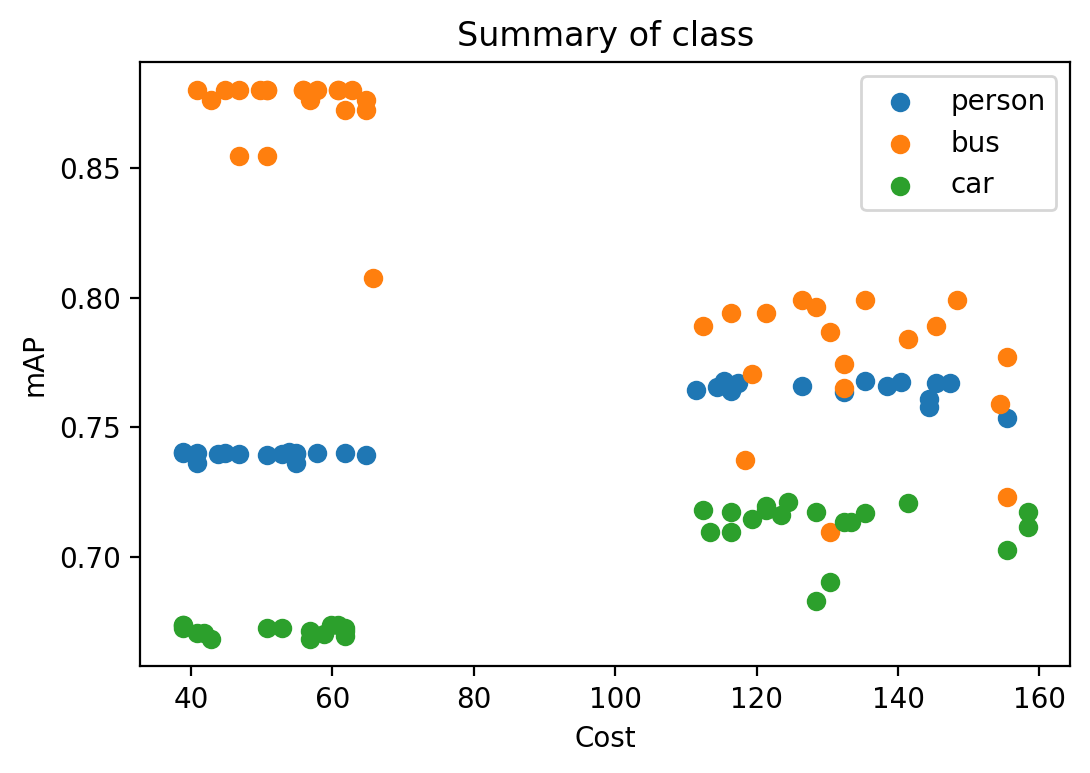

In [27]:
plt.rcParams['figure.dpi'] = 200

def plot(df,T):
    fig, ax = plt.subplots()
    for i, t in enumerate(T):
        print(t)
        data = df.loc[:,[t,'cost']]
        data.dropna(inplace=True)
        ax.scatter(df['cost'], df[t],label=t)
        
    plt.title('Summary of class')
    plt.xlabel('Cost')
    plt.ylabel('mAP')
    plt.legend()
    plt.show()
    
# print(classes)

plot(df_convert,['person','bus','car'])